In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('normalization_assesment_dataset_10k.csv')
print("Dataset shape: ",df.shape)
df.head()
df = df.rename(columns={"raw_comp_writers_text": "raw", "CLEAN_TEXT": "clean"})


Dataset shape:  (10000, 2)


In [2]:
# def handle_na(df):    
#     # Calculate null values for each column
#     null_counts = df.isnull().sum()
#     # Calculate percentage of null values
#     null_percentages = (null_counts / len(df)) * 100
#     print('null_percentages',null_percentages)
#     if all(null_percentages[column] for column in df.columns)  and df.shape[0]>=10000:
#         new_df = df.dropna()
#         print(new_df.shape)
#         return new_df
#     return df

# df = handle_na(df)
# df.head()
df['clean'] = df['clean'].fillna('')

In [3]:
max_char=0
max_words=0
for row in df['raw']:
    if isinstance(row, float):
        continue
    if len(str(row).split(' ')) > max_words:
        max_words = len(str(row).split(' '))
    if len(row) > max_char:
       max_char=len(row)
print(max_char)
print(max_words)
    
    

443
46


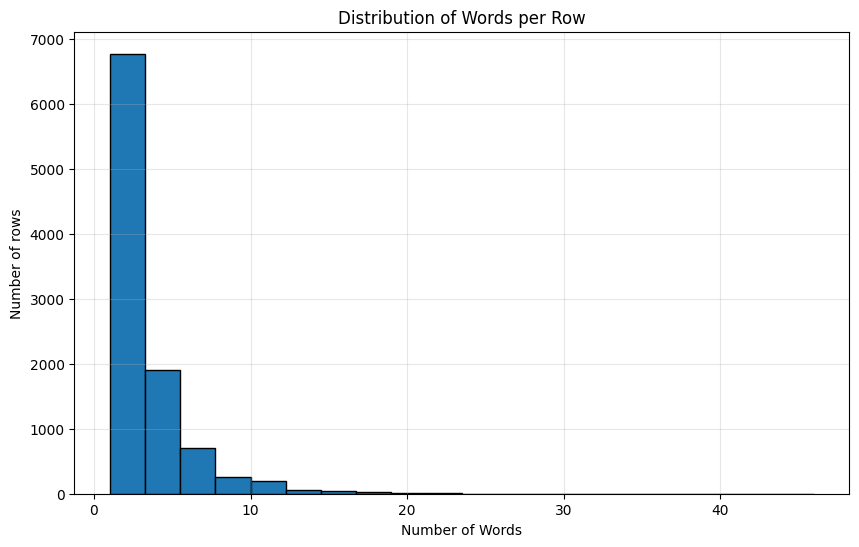

Average words per row: 3.5
Max words: 46.0


<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

def plot_word_counts(df_column):
   """
   plots words per row in a histogram
   """
   word_counts = df_column.str.split().str.len()
   
   plt.figure(figsize=(10, 6))
   plt.hist(word_counts, bins=20, edgecolor='black')
   plt.title('Distribution of Words per Row')
   plt.xlabel('Number of Words')
   plt.ylabel('Number of rows')
   plt.grid(True, alpha=0.3)
   plt.show()
   plt.savefig("distribution_words_per_row.png", dpi=300, bbox_inches="tight")
   print(f"Average words per row: {word_counts.mean():.1f}")
   print(f"Max words: {word_counts.max()}")


plot_word_counts(df['raw'])

In [5]:
raw_column='raw'

In [6]:
import re
def find_non_alpha(df, column_name):
    """
    Find all non-alphabetical characters
    """
    text = ' '.join(df[column_name].astype(str))
    non_alpha = re.findall(r'[^a-zA-Z\s]', text)
    # count occurrences
    char_counts = {char: text.count(char) for char in set(non_alpha)}
    return char_counts

In [7]:
from pprint import pprint
non_alpha_chars = find_non_alpha(df, raw_column)
print("Non-alphabetical characters found:")
pprint(non_alpha_chars)
print('different non-alpha characters:',len(non_alpha_chars))

Non-alphabetical characters found:
{'!': 10,
 '"': 44,
 '#': 19,
 '$': 17,
 '%': 11,
 '&': 981,
 "'": 91,
 '(': 271,
 ')': 263,
 '*': 2,
 '+': 1,
 ',': 1584,
 '-': 319,
 '.': 986,
 '/': 7773,
 '0': 101,
 '1': 93,
 '2': 68,
 '3': 50,
 '4': 21,
 '5': 51,
 '6': 26,
 '7': 28,
 '8': 40,
 '9': 42,
 ':': 11,
 ';': 8,
 '<': 344,
 '=': 2,
 '>': 344,
 '?': 4,
 '@': 4,
 '[': 25,
 '\\': 2,
 ']': 25,
 '_': 13,
 '`': 1,
 '|': 1,
 '«': 1,
 '»': 1,
 'Á': 16,
 'Â': 2,
 'Ä': 8,
 'Å': 2,
 'Æ': 1,
 'É': 5,
 'Í': 2,
 'Ñ': 1,
 'Ò': 1,
 'Ó': 4,
 'Ö': 6,
 'Ø': 5,
 'Ü': 2,
 'ß': 3,
 'à': 26,
 'á': 156,
 'â': 28,
 'ã': 20,
 'ä': 31,
 'å': 11,
 'æ': 4,
 'ç': 11,
 'è': 8,
 'é': 235,
 'ê': 31,
 'ë': 7,
 'ì': 6,
 'í': 134,
 'î': 1,
 'ï': 3,
 'ð': 1,
 'ñ': 42,
 'ò': 2,
 'ó': 71,
 'ô': 18,
 'õ': 3,
 'ö': 68,
 'ø': 12,
 'ù': 4,
 'ú': 43,
 'ü': 46,
 'ý': 3,
 'ă': 7,
 'ą': 1,
 'ć': 19,
 'Č': 1,
 'č': 1,
 'Đ': 18,
 'đ': 2,
 'ě': 1,
 'ğ': 1,
 'Ģ': 1,
 'ĩ': 1,
 'ī': 2,
 'İ': 1,
 'ı': 7,
 'Ł': 4,
 'ł': 16,
 'ń': 3,
 'ņ': 1,

In [8]:
import string

def find_punctuation_examples(df, column_name):
   """
   find puncuation characters and print one example for each
   """

   shown_examples = set()
   for idx, row in df.iterrows():
       text = str(row[column_name])
       for char in text:
           if char in string.punctuation and char not in shown_examples:
               print(f"\nPunctuation '{char}' in row {idx}:")
               print(row)
               shown_examples.add(char)

punct_marks = find_punctuation_examples(df, 'raw')


Punctuation '/' in row 0:
raw      Jordan Riley/Adam Argyle/Martin Brammer
clean    Jordan Riley/Adam Argyle/Martin Brammer
Name: 0, dtype: object

Punctuation '(' in row 8:
raw      UNKNOWN WRITER (999990)
clean                           
Name: 8, dtype: object

Punctuation ')' in row 8:
raw      UNKNOWN WRITER (999990)
clean                           
Name: 8, dtype: object

Punctuation '.' in row 10:
raw      L. Chandler/John Hammond
clean    L. Chandler/John Hammond
Name: 10, dtype: object

Punctuation '&' in row 24:
raw      Lavel Jackson & Demarcus Ford
clean      Lavel Jackson/Demarcus Ford
Name: 24, dtype: object

Punctuation '#' in row 28:
raw      #unknown#
clean             
Name: 28, dtype: object

Punctuation ',' in row 38:
raw      Rundown Spaz,Rundown Choppaboy
clean    Rundown Spaz/Rundown Choppaboy
Name: 38, dtype: object

Punctuation '<' in row 75:
raw      <Unknown>/Wright, Justyce Kaseem
clean               Wright/Justyce Kaseem
Name: 75, dtype: object

Punctuation

In [9]:
import string
def find_non_letter_examples(df, column_name):
    """
    Print one row per non-letter character found
    """
    
    shown_examples = set()
    for idx, row in df.iterrows():
        text = str(row[column_name])
        for char in text:
            # Check if character is not a letter and not whitespace
            if not char in string.ascii_letters and not char.isspace() and char not in shown_examples:
                print(f"\nNon-letter character '{char}' in row {idx}:")
                print(row)
                shown_examples.add(char)

non_letter_chars = find_non_letter_examples(df, raw_column)


Non-letter character '/' in row 0:
raw      Jordan Riley/Adam Argyle/Martin Brammer
clean    Jordan Riley/Adam Argyle/Martin Brammer
Name: 0, dtype: object

Non-letter character 'å' in row 1:
raw      Martin Hygård
clean    Martin Hygård
Name: 1, dtype: object

Non-letter character '(' in row 8:
raw      UNKNOWN WRITER (999990)
clean                           
Name: 8, dtype: object

Non-letter character '9' in row 8:
raw      UNKNOWN WRITER (999990)
clean                           
Name: 8, dtype: object

Non-letter character '0' in row 8:
raw      UNKNOWN WRITER (999990)
clean                           
Name: 8, dtype: object

Non-letter character ')' in row 8:
raw      UNKNOWN WRITER (999990)
clean                           
Name: 8, dtype: object

Non-letter character '.' in row 10:
raw      L. Chandler/John Hammond
clean    L. Chandler/John Hammond
Name: 10, dtype: object

Non-letter character 'ö' in row 14:
raw      Rikard Sjöblom
clean    Rikard Sjöblom
Name: 14, dtype: object


In [10]:
def find_angled_brackets_content(df, column_name):
    """
    Extract strings between < > characters
    """
    bracketed_content = set()
    for idx, row in df.iterrows():
        text = str(row[column_name])
        # Find all matches between < >
        matches = re.findall(r'<([^>]+)>', text)
        if matches:
            bracketed_content.update(matches)
    
    return list(bracketed_content)


brackets = find_angled_brackets_content(df, raw_column)
print("\nUnique bracketed content found:", brackets)



Unique bracketed content found: ['BMI', 'COTT', 'TBD', 'Unknown']


In [11]:
import json
keywords = [
    # Publishing and Rights Management
    'COPYRIGHT CONTROL', 'PUBLISHING', 'MUSIC PUBLISHING', 'ALL RIGHTS RESERVED',
    'RIGHTS ADMINISTERED', 'RIGHTS MANAGED', 'RIGHTS CONTROLLED',
    'PERFORMANCE RIGHTS', 'MECHANICAL RIGHTS', 'SYNC RIGHTS',
    'ADMINISTERED BY', 'LICENSED TO', 'CONTROLLED BY',
    
    # Business Entities
    'LIMITED', 'LTD', 'LLC', 'INC', 'INCORPORATED', 'CORP', 'CORPORATION',
    'GMBH', 'PTY', 'S.A.', 'N.V.', 'AG', 'CO', 'COMPANY',
    
    # Music Industry Terms
    'MUSIC', 'SONGS', 'PRODUCTIONS', 'ENTERTAINMENT', 'RECORDS',
    'RECORDINGS', 'LABEL', 'STUDIO', 'GROUP', 'BAND',
    
    # Major Companies and Common Affiliates
    'SONY', 'ATV', 'SONY/ATV', 'BMG', 'EMI', 'UNIVERSAL',
    'WARNER', 'WARNER CHAPPELL', 'KOBALT', 'BMI', 'ASCAP', 'SESAC',
    'COLUMBIA', 'ATLANTIC', 'CAPITOL', 'MOTOWN', 'RCA',
    
    # Professional Designations
    'MUSIKVERLAG', 'ÉDITIONS', 'EDITIONS', 'VERLAG',
    'MUSIC GROUP', 'MEDIA', 'PARTNERS', 'ASSOCIATES',
    
    # Common Suffixes and Descriptors
    'WORLDWIDE', 'INTERNATIONAL', 'GLOBAL', 'MANAGEMENT',
    'HOLDINGS', 'VENTURES', 'ENTERPRISES', 'WORKS',
    
    # Rights Organizations
    'PERFORMING RIGHTS', 'SOCIETY', 'ORGANIZATION', 'ASSOCIATION',
    'COLLECTION SOCIETY', 'RIGHTS SOCIETY',
    
    # Digital and Modern Terms
    'DIGITAL', 'DISTRIBUTION', 'STREAMING', 'LICENSING',
    
    # Legal and Administrative
    'ADMINISTERED', 'REPRESENTS', 'REPRESENTED BY',
    'ON BEHALF OF', 'C/O', 'CARE OF',
    
    # Geographical Indicators
    '(UK)', '(US)', '(EU)', '(JP)', 'UK', 'USA', 'AMERICA',
    'EUROPEAN', 'INTERNATIONAL', 'GLOBAL'
]

# Clean up the keywords list (remove duplicates, strip whitespace)
keywords = list(set([k.strip() for k in keywords]))
# Sort by length (longer phrases first to avoid partial replacements)
keywords = sorted(keywords, key=len, reverse=True)
print(keywords)
keywords=keywords+brackets
with open("keywords.json", "w") as f:
    json.dump(keywords, f, indent=4)

['RIGHTS ADMINISTERED', 'ALL RIGHTS RESERVED', 'COLLECTION SOCIETY', 'PERFORMANCE RIGHTS', 'MECHANICAL RIGHTS', 'RIGHTS CONTROLLED', 'COPYRIGHT CONTROL', 'PERFORMING RIGHTS', 'MUSIC PUBLISHING', 'ADMINISTERED BY', 'WARNER CHAPPELL', 'REPRESENTED BY', 'RIGHTS MANAGED', 'RIGHTS SOCIETY', 'CONTROLLED BY', 'ENTERTAINMENT', 'INTERNATIONAL', 'ADMINISTERED', 'INCORPORATED', 'DISTRIBUTION', 'ORGANIZATION', 'ON BEHALF OF', 'PRODUCTIONS', 'MUSIC GROUP', 'CORPORATION', 'ASSOCIATION', 'MUSIKVERLAG', 'SYNC RIGHTS', 'LICENSED TO', 'ENTERPRISES', 'REPRESENTS', 'ASSOCIATES', 'PUBLISHING', 'MANAGEMENT', 'RECORDINGS', 'LICENSING', 'STREAMING', 'UNIVERSAL', 'WORLDWIDE', 'SONY/ATV', 'ÉDITIONS', 'VENTURES', 'HOLDINGS', 'EUROPEAN', 'PARTNERS', 'EDITIONS', 'COLUMBIA', 'ATLANTIC', 'COMPANY', 'CAPITOL', 'LIMITED', 'AMERICA', 'CARE OF', 'SOCIETY', 'RECORDS', 'DIGITAL', 'WARNER', 'STUDIO', 'MOTOWN', 'VERLAG', 'GLOBAL', 'KOBALT', 'LABEL', 'SESAC', 'MUSIC', 'WORKS', 'GROUP', 'SONGS', 'ASCAP', 'MEDIA', 'GMBH', 'N.V

In [12]:
with open("keywords.json", "r") as f:
    keywords = json.load(f)
def heuristic_clean(raw_text, keywords):
   """Clean text using heuristic rules"""
   import string
   
   # Remove keywords
   clean_text = raw_text
   for keyword in keywords:
       clean_text = clean_text.replace(keyword, '')
   
   # Replace & and comma with /
   clean_text = clean_text.replace(' & ', '/').replace('&', '/').replace(',', '/')
   
   # Replace punctuation except / with space
   trans = str.maketrans({p: ' ' for p in string.punctuation if p != '/'})
   clean_text = clean_text.translate(trans)
   
   # Replace multiple spaces with single space
   clean_text = ' '.join(clean_text.split())
   
   # Remove spaces around /
   clean_text = re.sub(r'\s*/\s*', '/', clean_text)

   return clean_text


text = '<Unknown>/Wright, Justyce Kaseem'
clean_text = heuristic_clean(text, keywords)
print(clean_text)

/Wright/Justyce Kaseem


In [13]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Split data
X = df['raw']
y = df['clean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions using heuristic_clean
y_pred = [heuristic_clean(text, keywords) for text in X_test]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')

# Show some examples
print('\nExample predictions:')
for i in range(5):
   print(f'\nInput: {X_test.iloc[i]}')
   print(f'Predicted: {y_pred[i]}')
   print(f'Expected: {y_test.iloc[i]}')

Accuracy: 0.648
F1 Score: 0.648

Example predictions:

Input: Endo Anaconda/Balts Nill
Predicted: Endo Anaconda/Balts Nill
Expected: Endo Anaconda/Balts Nill

Input: Jessica Curry
Predicted: Jessica Curry
Expected: Jessica Curry

Input: Peter Kelly/Andy Monaghan/Jill O'Sullivan
Predicted: Peter Kelly/Andy Monaghan/Jill O Sullivan
Expected: Peter Kelly/Andy Monaghan/Jill O'Sullivan

Input: Thomas Bergersen/Nick Phoenix
Predicted: Thomas Bergersen/Nick Phoenix
Expected: Thomas Bergersen/Nick Phoenix

Input: Candelaria Tojin
Predicted: Candelaria Tojin
Expected: Candelaria Tojin
